# Homework 1

```yaml
Author:   Andrew Avitabile
Date:     01 January 2024
Course:   DS 5001 Exploratory Text Analytics
Module:   01 Getting Started
Topic:    M01 Homework
```

## Purpose

Take a raw text file from Project Gutenberg and convert it into a dataframe of tokens. 

Explore some properties of the data. 

## Set Up

In [1]:
import pandas as pd

In [2]:
import configparser
config = configparser.ConfigParser()

In [3]:
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']

## Import data and basic cleaning

In [4]:
# Import data (Mary Shelley's, Frankenstien; or, The Modern Prometheus)
src_file = f"{data_home}/gutenberg/pg42324.txt"

# Read data, line-by-line
lines = open(src_file, 'r').readlines()

# Turn into a pandas data frame
text = pd.DataFrame(lines)

# Create a column called "line_str"
text.columns = ['line_str']

# Create a column "len" that is the length of each line
text['len'] = text.line_str.str.len()

# Removing line breaks
chunk_pat = '\n\n' 
chunks = open(src_file, 'r').read().split(chunk_pat)
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'
text.chunk_str = text.chunk_str.str.replace('\n+', ' ', regex=True).str.strip()

# Convert lines to tokens
K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str')
K.index.names = ['chunk_num','token_num']

# Text pre-processing
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()

#Get vocabulary of words from text
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'

#Define p as the proportion of times a word appears in the text
V['p'] = V.n / V.n.sum()

## Question 1

What is the name of the novel associated with the text file?

### Answer



## Question 2

How many tokens does the raw text have? By raw text, we mean the text as-is, without all of the Gutenberg boilerplate removed.

### Answer
The length of K is the number of tokens in the text (after removing linebreaks).

In [5]:
len(K)

80985

## Question 3

What is the most frequent pronoun in the text?

### Answer

The plot below shows that "i" is the most frequent pronoun in the text.

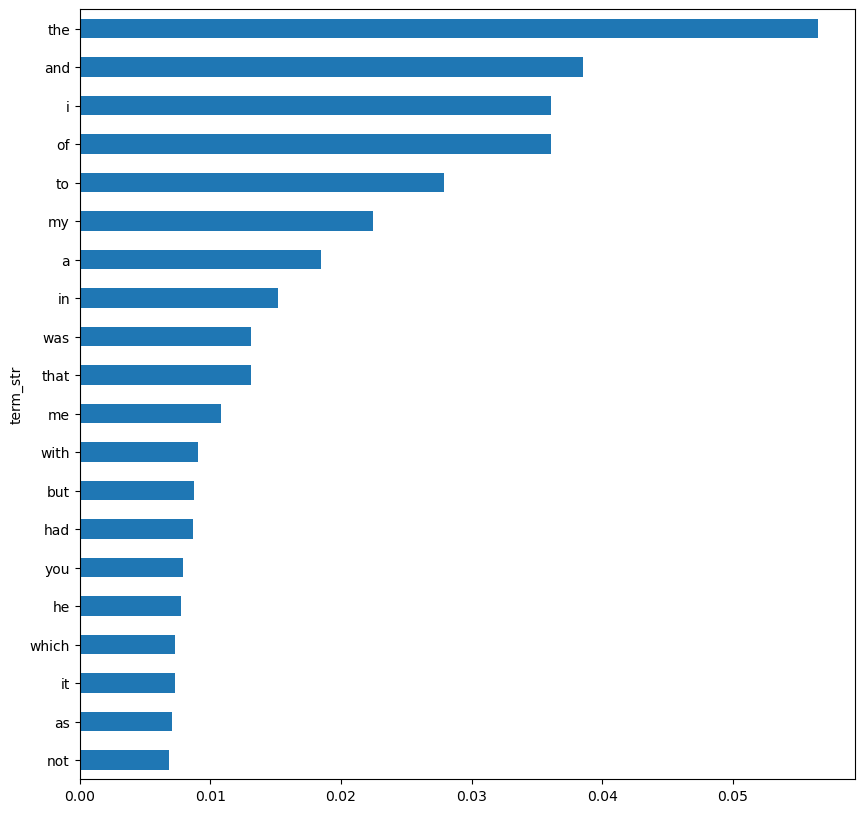

In [6]:
V.p.head(20).sort_values().plot.barh(figsize=(10,10));

## Question 4

Which subject pronoun is most frequent in the text we imported in class? 

In [7]:
# Import data (Now, Jane Austen's Persuasion)
src_file = f"{data_home}/gutenberg/pg105.txt"

# Read data, line-by-line
lines = open(src_file, 'r').readlines()

# Turn into a pandas data frame
text = pd.DataFrame(lines)

# Create a column called "line_str"
text.columns = ['line_str']

# Create a column "len" that is the length of each line
text['len'] = text.line_str.str.len()

# Removing line breaks
chunk_pat = '\n\n' 
chunks = open(src_file, 'r').read().split(chunk_pat)
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'
text.chunk_str = text.chunk_str.str.replace('\n+', ' ', regex=True).str.strip()

# Convert lines to tokens
K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str')
K.index.names = ['chunk_num','token_num']

# Text pre-processing
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()

#Get vocabulary of words from text
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'

#Define p as the proportion of times a word appears in the text
V['p'] = V.n / V.n.sum()

### Answer

The plot below shows that "her" is the most frequent pronoun in the text.

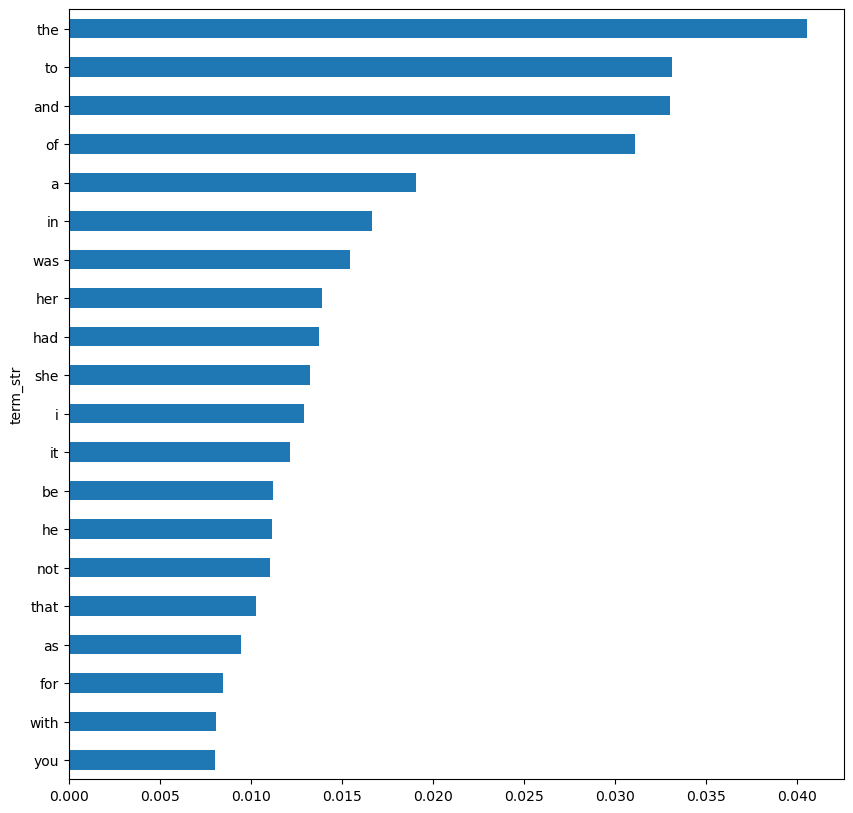

In [8]:
V.p.head(20).sort_values().plot.barh(figsize=(10,10));

## Question 5

Provide a brief explanation for this difference, based on what you may know about the two novels.

### Answer

The difference in the most used pronouns between these texts is due to the point of view (POV) of the narrator. Mary Shelley's Frankenstein is written in the first-person POV of Victor Frankenstein, so the use of "I" is likely him referring to himself. Jane Austen's Persuasion is written in the third-person POV and uses of "her" are likely referring to Anne Elliot, the text's main character.